Downloading...
From (original): https://drive.google.com/uc?id=1RjRwfhmAIwiw6hBUIJywlfTMfQLrYozY
From (redirected): https://drive.google.com/uc?id=1RjRwfhmAIwiw6hBUIJywlfTMfQLrYozY&confirm=t&uuid=460500ca-a6d6-4ea8-af09-9670fb98ed89
To: d:\10Academy\week6-credi-trust-complaint-bot\notebooks\data.csv
100%|██████████| 6.04G/6.04G [19:21<00:00, 5.20MB/s]  
C:\Users\yorda\AppData\Local\Temp\ipykernel_5184\1891997605.py:22: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output)



✅ Data loaded successfully!
🔢 Dataset shape: (9609797, 18)

📌 First 5 rows of data:
  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer complaint narrative  \
0   

C:\Users\yorda\AppData\Local\Temp\ipykernel_5184\1891997605.py:53: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Or use df.dropna()


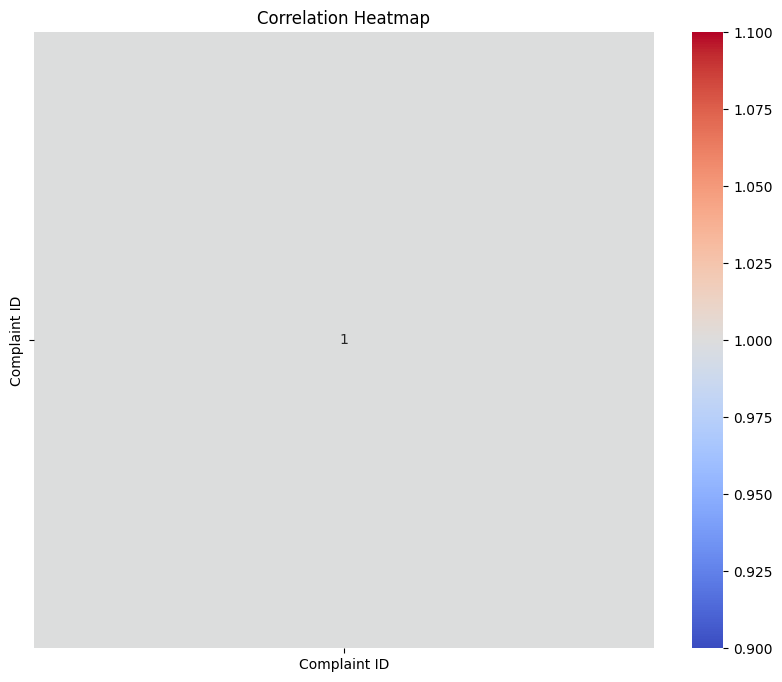

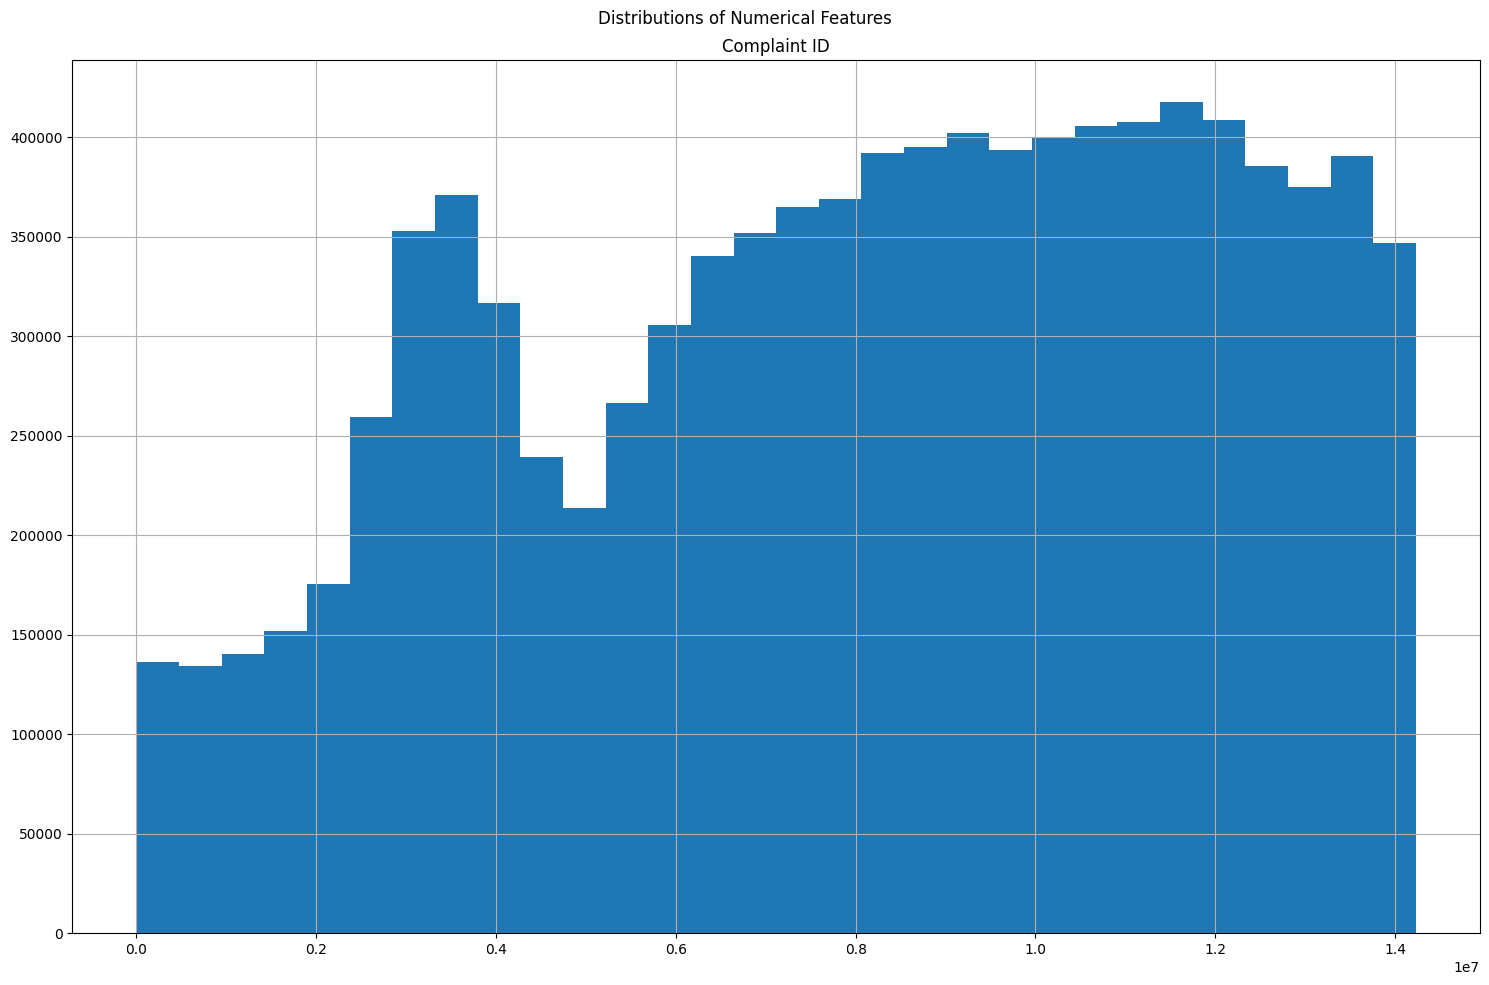

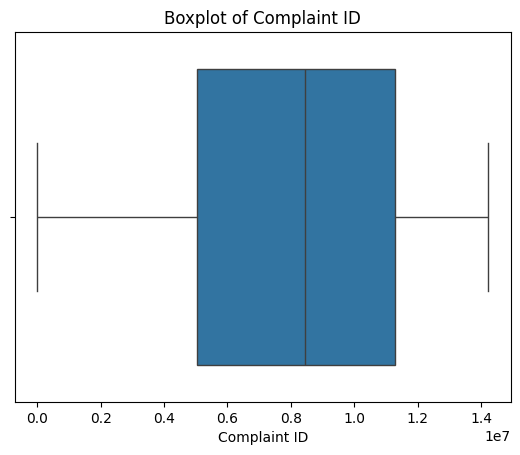


📌 Value counts for 'Date received':
Date received
2025-01-17    34093
2025-01-16    24123
2025-01-23    21762
2025-01-15    21361
2025-01-18    21180
              ...  
2011-12-24       11
2011-12-25       10
2017-04-22        9
2014-03-09        5
2022-05-07        4
Name: count, Length: 4952, dtype: int64

📌 Value counts for 'Product':
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, 

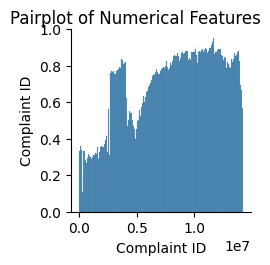


✅ Cleaned data saved as 'cleaned_data.csv'


In [3]:
# 1. Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import os

# 2. Download file from Google Drive
file_id = "1RjRwfhmAIwiw6hBUIJywlfTMfQLrYozY"
output = "data.csv"  # Modify if the file isn't a CSV
url = f"https://drive.google.com/uc?id={file_id}"

# Remove file if already exists to avoid caching issues
if os.path.exists(output):
    os.remove(output)

gdown.download(url, output, quiet=False)

# 3. Load the dataset
try:
    df = pd.read_csv(output)
except Exception:
    df = pd.read_excel(output)  # In case it's Excel

print("\n✅ Data loaded successfully!")
print("🔢 Dataset shape:", df.shape)

# 4. Initial Exploration
print("\n📌 First 5 rows of data:")
print(df.head())

print("\n🔍 Data Info:")
print(df.info())

print("\n📊 Summary statistics:")
print(df.describe(include='all'))

# 5. Data Cleaning
print("\n🧹 Cleaning Data...")

# Drop duplicates
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"🗑️ Removed {initial_shape[0] - df.shape[0]} duplicate rows")

# Handle missing values
missing = df.isnull().sum()
print("\n❓ Missing values per column:")
print(missing[missing > 0])

# Fill or drop missing values (customize as needed)
df.fillna(method='ffill', inplace=True)  # Or use df.dropna()

# 6. EDA Visualizations

# Correlation heatmap (numerical data)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Histograms
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Distributions of Numerical Features")
plt.tight_layout()
plt.show()

# Boxplots
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Categorical value counts
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n📌 Value counts for '{col}':")
    print(df[col].value_counts(dropna=False))

# Optional: Pairplot for small datasets
if len(numeric_cols) <= 5:
    sns.pairplot(df[numeric_cols])
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.show()

# 7. Save cleaned data
df.to_csv("cleaned_data.csv", index=False)
print("\n✅ Cleaned data saved as 'cleaned_data.csv'")
